In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Specify the file path
file_path1 = r'C:\Users\samka\upenn\Project 1\Katie_csv\average borrower.csv'
file_path2 = r'C:\Users\samka\upenn\Project 1\Katie_csv\student-loan-by-state.csv'

#read the files
average_borrower = pd.read_csv(file_path1, skiprows=5, usecols=[0, 6, 7])
student_loan_by_state = pd.read_csv(file_path2, skiprows=5, usecols=[0, 6, 7])

# Merge the DataFrames on the common column "state/area"
merged_df = pd.merge(average_borrower, student_loan_by_state, on='state/area', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_student_loan_debt.csv', index=True)

print(merged_df)

              state/area     2020_x     2021_x        2020_y        2021_y
0                 Alaska   $33,500    $33,900        71,200        70,600 
1                Alabama   $37,100    $37,500       601,500       614,900 
2               Arkansas   $32,300    $32,400       366,600       373,900 
3                Arizona   $36,100    $36,300       856,700       870,100 
4             California   $37,100    $37,700     3,987,700     4,008,400 
5               Colorado   $36,300    $36,800       808,900       818,800 
6            Connecticut   $35,700    $36,300       540,900       542,300 
7   District of Columbia   $58,800    $58,900       120,400       120,500 
8               Delaware   $36,800    $37,200       133,500       135,300 
9                Florida   $38,300    $38,700     2,593,800     2,665,400 
10               Georgia   $41,200    $41,600     1,599,800     1,639,600 
11                Hawaii   $34,800    $35,700       127,300       126,500 
12                  Iowa 

In [3]:
#List of specific states
specific_states = ['Oklahoma','Louisiana', 'Mississippi', 'North Dakota', 'South Dakota', 'Minnesota']
print(specific_states)

['Oklahoma', 'Louisiana', 'Mississippi', 'North Dakota', 'South Dakota', 'Minnesota']


In [4]:
states = merged_df[merged_df['state/area'].isin(specific_states)].copy()
states.reset_index(drop=True, inplace=True)
print(states)

     state/area     2020_x     2021_x     2020_y     2021_y
0     Louisiana   $34,900    $35,000    626,300    639,300 
1     Minnesota   $32,200    $32,700    888,700    884,400 
2   Mississippi   $36,900    $37,500    414,700    417,600 
3  North Dakota   $27,100    $28,500     96,500    114,100 
4      Oklahoma   $31,800    $32,100    462,700    474,100 
5  South Dakota   $28,600    $29,800    130,500    132,000 


In [5]:
pd.set_option('display.width', 200)

states.rename(columns={'state/area': 'State',
                       '2020_x': '2020 Avg Debt',
                       '2021_x': '2021 Avg Debt',
                       '2020_y': '2020 Borrowers',
                       '2021_y': '2021 Borrowers'}, inplace=True)

columns_to_convert = ['2020 Avg Debt', '2021 Avg Debt', '2020 Borrowers', '2021 Borrowers']

# Remove the dollar sign ($) and commas from the specified columns
states[columns_to_convert] = states[columns_to_convert].replace(r'[$,]', '', regex=True)

# Convert the columns to numeric
states[columns_to_convert] = states[columns_to_convert].apply(pd.to_numeric)

# Now check the data types
#print(states[columns_to_convert])

print(states)

          State  2020 Avg Debt  2021 Avg Debt  2020 Borrowers  2021 Borrowers
0     Louisiana          34900          35000          626300          639300
1     Minnesota          32200          32700          888700          884400
2   Mississippi          36900          37500          414700          417600
3  North Dakota          27100          28500           96500          114100
4      Oklahoma          31800          32100          462700          474100
5  South Dakota          28600          29800          130500          132000


In [6]:
#print(states.dtypes)

In [7]:
states_had = ['Louisiana', 'Mississippi', 'Oklahoma']
selected_columns = ['State', '2020 Avg Debt', '2021 Avg Debt', '2020 Borrowers', '2021 Borrowers']

# Select the desired rows and columns
had_data = states.loc[states['State'].isin(states_had), selected_columns]

# Print the selected data
print(had_data)

         State  2020 Avg Debt  2021 Avg Debt  2020 Borrowers  2021 Borrowers
0    Louisiana          34900          35000          626300          639300
2  Mississippi          36900          37500          414700          417600
4     Oklahoma          31800          32100          462700          474100


In [8]:
#print(selected_data['2020 Avg Debt'])

In [9]:
#print(selected_data.dtypes)

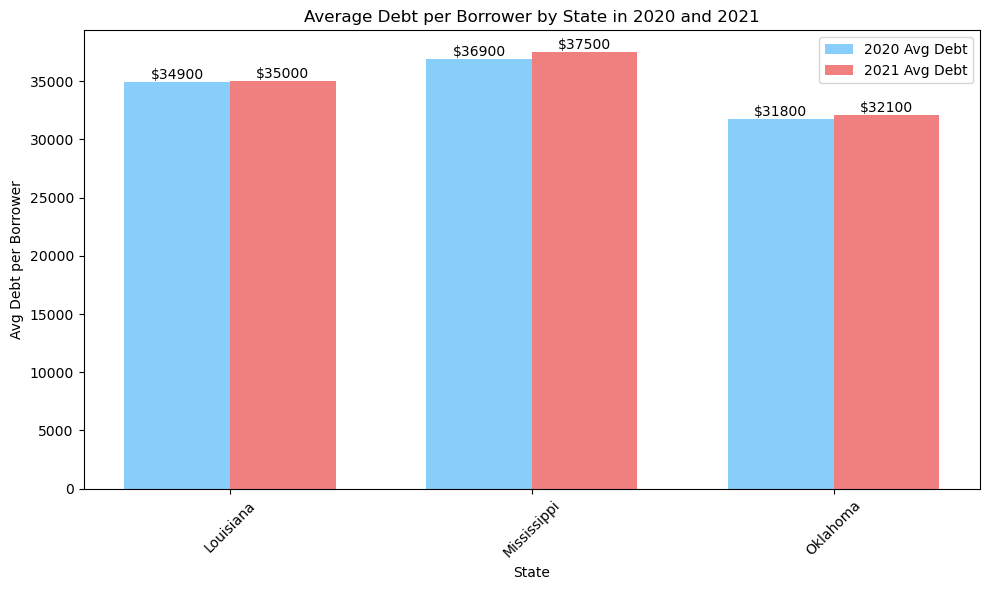

In [10]:
df = pd.DataFrame(had_data)

plt.figure(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(df['State']))

# Plot bars for 2020 data
bars_2020 = plt.bar(x - bar_width/2, df['2020 Avg Debt'], width=bar_width, color='lightskyblue', label='2020 Avg Debt')

# Plot bars for 2021 data, slightly offset from 2020 bars
bars_2021 = plt.bar(x + bar_width/2, df['2021 Avg Debt'], width=bar_width, color='lightcoral', label='2021 Avg Debt')

plt.xlabel('State')
plt.ylabel('Avg Debt per Borrower')
plt.title('Average Debt per Borrower by State in 2020 and 2021')

# Add data labels with dollar signs
for bars, column_name in zip([bars_2020, bars_2021], ['2020 Avg Debt', '2021 Avg Debt']):
    for bar, value in zip(bars, df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

plt.legend()
plt.xticks(ticks=x, labels=df['State'], rotation=45)  # Set x-axis ticks to state names
plt.tight_layout()
plt.show()

In [11]:
total_2020_had_debt = had_data['2020 Avg Debt'].sum()

print("Total debt for 2020 high anxiety and depression states:", total_2020_had_debt)

Total debt for 2020 high anxiety and depression states: 103600


In [12]:
total_2021_had_debt = had_data['2021 Avg Debt'].sum()

print("Total debt for 2021 high anxiety and depression states:", total_2021_had_debt)

Total debt for 2021 high anxiety and depression states: 104600


In [14]:
states_lad =  ['Minnesota', 'North Dakota', 'South Dakota']
low_columns = ['State', '2020 Avg Debt', '2021 Avg Debt', '2020 Borrowers', '2021 Borrowers']

# Select the desired rows and columns
lad_data = states.loc[states['State'].isin(states_lad), low_columns]

# Print the selected data
print(lad_data)

          State  2020 Avg Debt  2021 Avg Debt  2020 Borrowers  2021 Borrowers
1     Minnesota          32200          32700          888700          884400
3  North Dakota          27100          28500           96500          114100
5  South Dakota          28600          29800          130500          132000


In [15]:
#print(low_selected_data['2020 Avg Debt'])

In [16]:
#print(selected_data.dtypes)

In [17]:
total_2020_lad_debt = lad_data['2020 Avg Debt'].sum()

print("Total debt for 2020 low anxiety and depression states:", total_2020_lad_debt)

Total debt for 2020 low anxiety and depression states: 87900


In [18]:
total_2021_lad_debt = lad_data['2021 Avg Debt'].sum()

print("Total debt for 2021 low anxiety and depression states:", total_2021_lad_debt)

Total debt for 2021 low anxiety and depression states: 91000


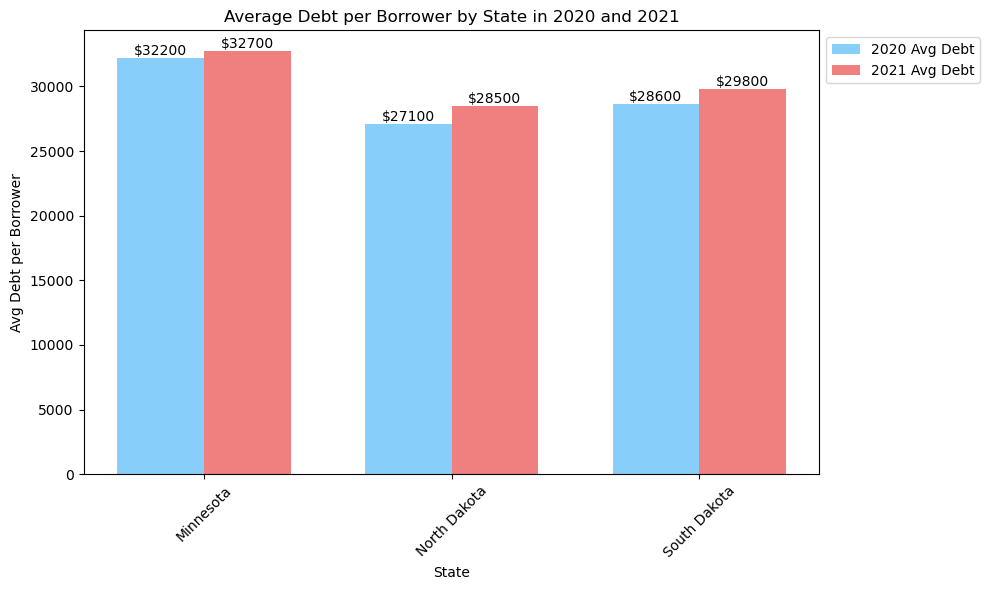

In [19]:
# Assuming df is your DataFrame with the data
df = pd.DataFrame(lad_data)


plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(df['State']))

# Plot bars for 2020 data
bars_2020 = plt.bar(x - bar_width/2, df['2020 Avg Debt'], width=bar_width, color='lightskyblue', label='2020 Avg Debt')

# Plot bars for 2021 data, slightly offset from 2020 bars
bars_2021 = plt.bar(x + bar_width/2, df['2021 Avg Debt'], width=bar_width, color='lightcoral', label='2021 Avg Debt')

plt.xlabel('State')
plt.ylabel('Avg Debt per Borrower')
plt.title('Average Debt per Borrower by State in 2020 and 2021')

# Add data labels with dollar signs
for bars, column_name in zip([bars_2020, bars_2021], ['2020 Avg Debt', '2021 Avg Debt']):
    for bar, value in zip(bars, df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks=x, labels=df['State'], rotation=45)  # Set x-axis ticks to state names
plt.tight_layout()
plt.show()

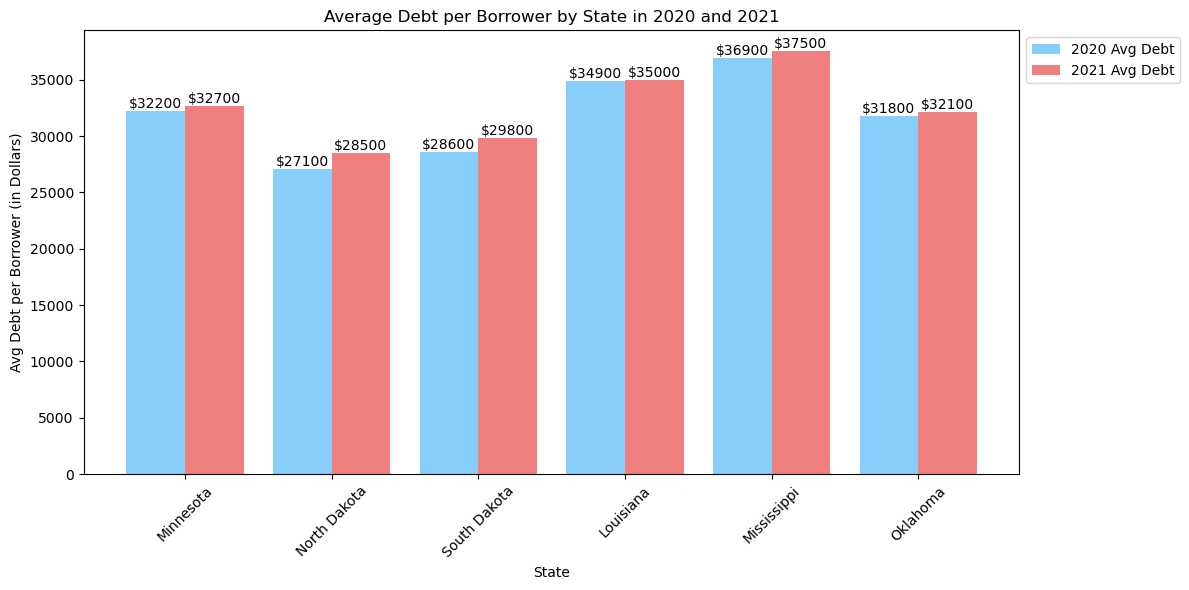

In [20]:
# Assuming df_lad and df_had are your DataFrames with the respective data
df_lad = pd.DataFrame(lad_data)
df_had = pd.DataFrame(had_data)

# Concatenate both DataFrames vertically
df = pd.concat([df_lad, df_had], ignore_index=True)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_width = 0.6  # Adjust the width of the bars as needed
x = df.index * 1.5  # Use DataFrame index for x positions and add a multiplier for spacing

# Plot bars for 2020 data with an offset for each state
bars_2020 = plt.bar(x - bar_width/2, df['2020 Avg Debt'], width=bar_width, color='lightskyblue', label='2020 Avg Debt')

# Plot bars for 2021 data with an offset for each state, slightly offset from 2020 bars
bars_2021 = plt.bar(x + bar_width/2, df['2021 Avg Debt'], width=bar_width, color='lightcoral', label='2021 Avg Debt')

plt.xlabel('State')
plt.ylabel('Avg Debt per Borrower (in Dollars)')
plt.title('Average Debt per Borrower by State in 2020 and 2021')

# Add data labels with dollar signs
for bars, column_name in zip([bars_2020, bars_2021], ['2020 Avg Debt', '2021 Avg Debt']):
    for bar, value in zip(bars, df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks=x, labels=df['State'], rotation=45)  # Set x-axis ticks to state names
plt.tight_layout()
plt.show()

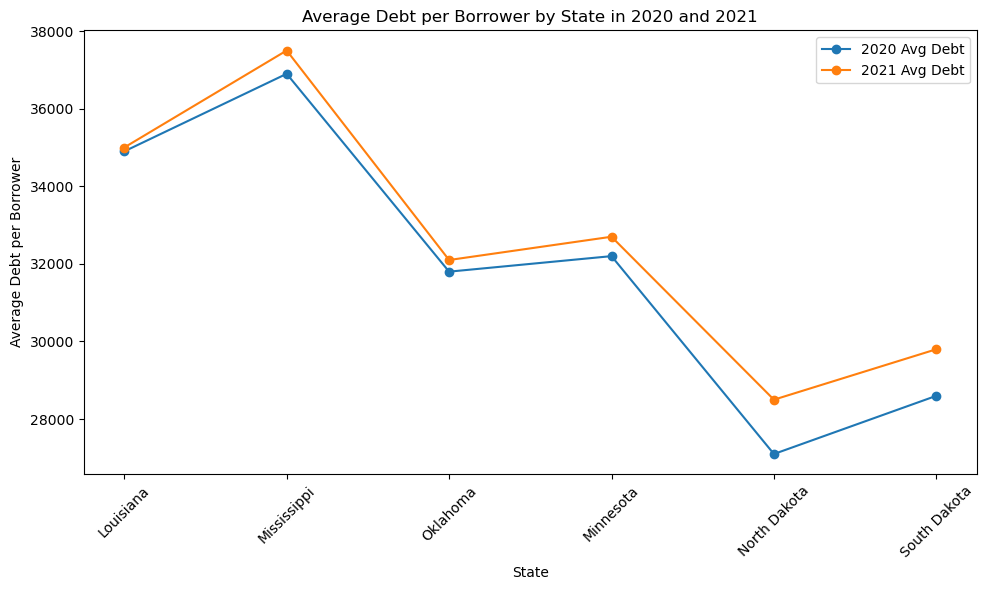

In [22]:

# Convert data to DataFrames
df1 = pd.DataFrame(had_data)
df2 = pd.DataFrame(lad_data)

# Merge the two DataFrames
df = pd.concat([df1, df2], ignore_index=True)

# Define the desired order of states
desired_order = ['Louisiana', 'Mississippi', 'Oklahoma', 'Minnesota', 'North Dakota', 'South Dakota']

# Plot
plt.figure(figsize=(10, 6))

# Plot 2020 Avg Debt
plt.plot(df['State'], df['2020 Avg Debt'], marker='o', label='2020 Avg Debt')

# Plot 2021 Avg Debt
plt.plot(df['State'], df['2021 Avg Debt'], marker='o', label='2021 Avg Debt')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Debt per Borrower')
plt.title('Average Debt per Borrower by State in 2020 and 2021')

# Set the order of states on the x-axis
plt.xticks(desired_order, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [24]:
# Assuming had_data and lad_data are your DataFrames with the respective data
total_2020_had_debt = had_data['2020 Avg Debt'].sum()
total_2021_had_debt = had_data['2021 Avg Debt'].sum()
total_2020_lad_debt = lad_data['2020 Avg Debt'].sum()
total_2021_lad_debt = lad_data['2021 Avg Debt'].sum()

# Creating a DataFrame for the totals
totals_data = {
    'Year': ['2020', '2021'],
    'LAD Total Debt': [total_2020_lad_debt, total_2021_lad_debt],
    'HAD Total Debt': [total_2020_had_debt, total_2021_had_debt]
}
totals_df = pd.DataFrame(totals_data)

# Displaying the table
print("Total Debt by Year:")
print(totals_df)

Total Debt by Year:
   Year  LAD Total Debt  HAD Total Debt
0  2020           87900          103600
1  2021           91000          104600


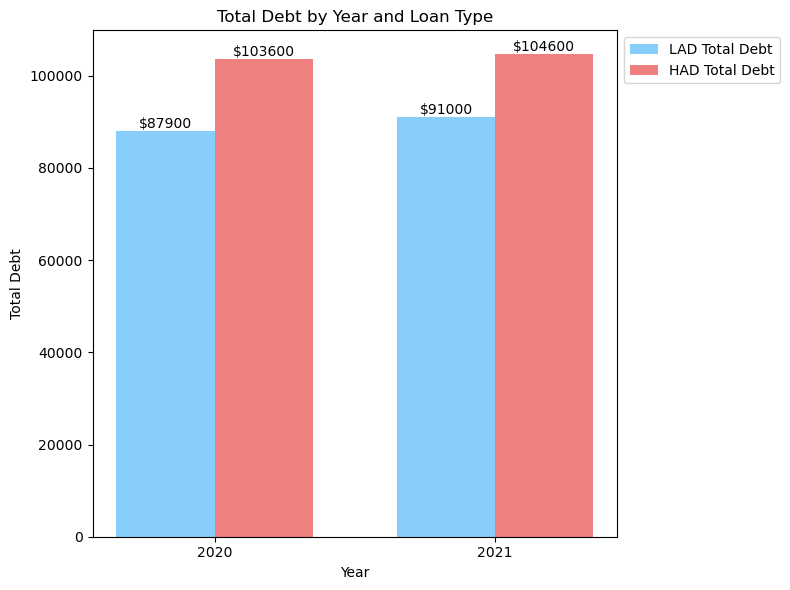

In [27]:
# Assuming had_data and lad_data are your DataFrames with the respective data
total_2020_had_debt = 103600  # Replace with the actual total value
total_2021_had_debt = 104600  # Replace with the actual total value
total_2020_lad_debt = 87900   # Replace with the actual total value
total_2021_lad_debt = 91000   # Replace with the actual total value

# Creating a DataFrame for the totals
totals_data = {
    'Year': ['2020', '2021'],
    'LAD Total Debt': [total_2020_lad_debt, total_2021_lad_debt],
    'HAD Total Debt': [total_2020_had_debt, total_2021_had_debt]
}
totals_df = pd.DataFrame(totals_data)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(totals_df['Year']))

bars_lad = plt.bar(x, totals_df['LAD Total Debt'], width=bar_width, color='lightskyblue', label='LAD Total Debt')
bars_had = plt.bar([i + bar_width for i in x], totals_df['HAD Total Debt'], width=bar_width, color='lightcoral', label='HAD Total Debt')

plt.xlabel('Year')
plt.ylabel('Total Debt')
plt.title('Total Debt by Year and Loan Type')
plt.xticks([i + bar_width / 2 for i in x], totals_df['Year'])

# Add data labels with dollar signs
for bars, column_name in zip([bars_lad, bars_had], ['LAD Total Debt', 'HAD Total Debt']):
    for bar, value in zip(bars, totals_df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()